   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

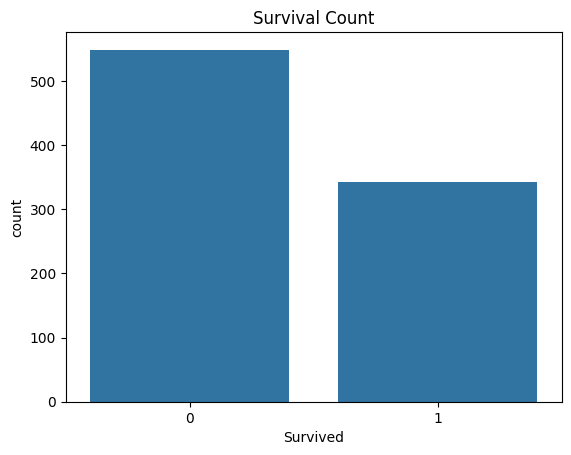

Survival Rate: 38.38%


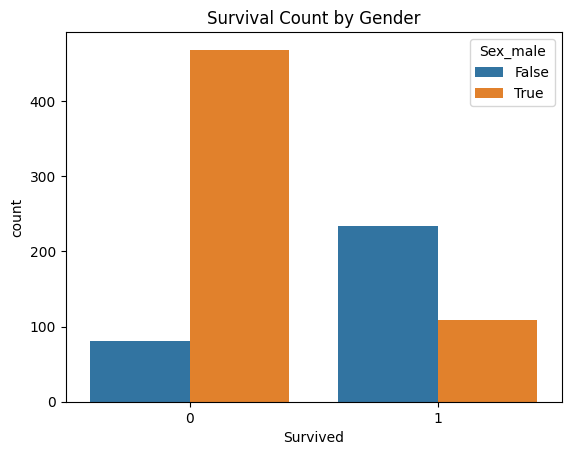

Sex_male
False    0.742038
True     0.188908
Name: Survived, dtype: float64


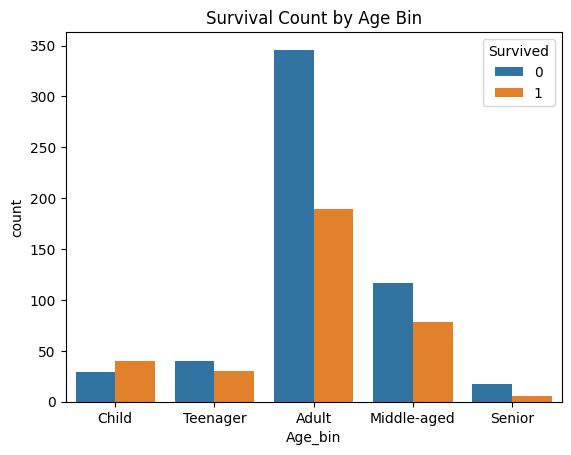

Age_bin
Child          0.579710
Teenager       0.428571
Adult          0.353271
Middle-aged    0.400000
Senior         0.227273
Name: Survived, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_6500\2961209957.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age_bin = data.groupby('Age_bin')['Survived'].mean()


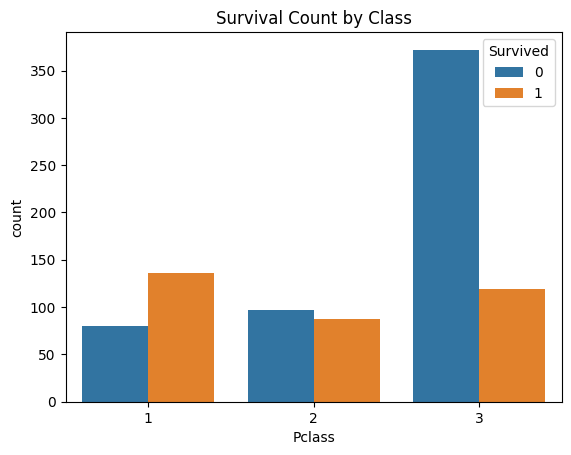

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('./titanic/train.csv')

print(data.head())

print(data.describe())

print(data.info())

# Check for missing values
print(data.isnull().sum())

# Fill missing values in the 'Age' column with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing values in the 'Embarked' column with the most common port
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values
data.drop(columns=['Cabin'], inplace=True)

# Verify missing values are handled
print(data.isnull().sum())

# Convert categorical variables to numeric
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Display the first few rows of the dataset to check the changes
print(data.head())


# Plot the survival rate
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()

# Calculate and display the survival rate
survival_rate = data['Survived'].mean()
print(f'Survival Rate: {survival_rate * 100:.2f}%')

# Plot the survival rate by gender
sns.countplot(x='Survived', hue='Sex_male', data=data)
plt.title('Survival Count by Gender')
plt.show()

# Calculate and display the survival rate by gender
survival_rate_by_gender = data.groupby('Sex_male')['Survived'].mean()
print(survival_rate_by_gender)


# Create age bins
data['Age_bin'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior'])

# Plot the survival rate by age bin
sns.countplot(x='Age_bin', hue='Survived', data=data)
plt.title('Survival Count by Age Bin')
plt.show()

# Calculate and display the survival rate by age bin
survival_rate_by_age_bin = data.groupby('Age_bin')['Survived'].mean()
print(survival_rate_by_age_bin)


# Plot the survival rate by class
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Count by Class')
plt.show()

# Calculate and display the survival rate by class
survival_rate_by_class = data.groupby('Pclass')['Survived'].mean()
print(survival_rate_by_class)



